<a href="https://colab.research.google.com/github/Supassara-pmp/Coursework/blob/main/DT_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree with Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(
		cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


## Pre-pruning the tree

In [ ]:
tree = DecisionTreeClassifier()
#creterion = 'gini'/'entrophy' หา informative feature -> ได้ node ที่มีความ pure มากที่สุด

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) #ต้องทดลอง max_depth ไปเรื่อยๆ
#tree = DecisionTreeClassifier(random_state=0) # depth 7

tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [ ]:
print(tree.get_depth(), tree.get_n_leaves()) # depth = 7, leaves = 18

4 11


## Plot Decision Tree

In [ ]:
from sklearn.tree import export_graphviz


export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
		 feature_names=cancer.feature_names, impurity=False, filled=True)


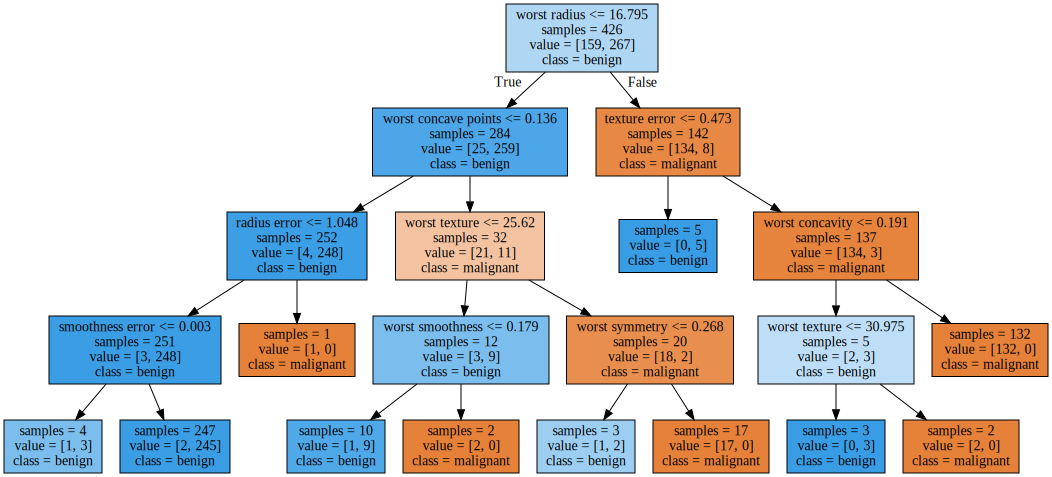

In [ ]:
import graphviz
with open("tree.dot") as f:
	dot_graph = f.read()
graphviz.Source(dot_graph)

## Plot Feature Important

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))
#0.72682851 the most informative feature

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#plot feature importsances -> worst radius จะตรงกับ decision trees

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  print(n_features)

30


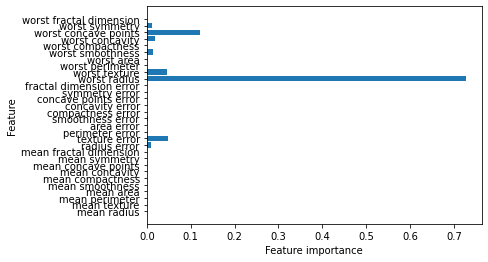

In [ ]:
plot_feature_importances_cancer(tree)

In [ ]:
from sklearn.model_selection import  GridSearchCV

param_grid = {'max_depth': range(1,7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=Fal

In [ ]:
print(grid.best_params_) #depth 3 ดีสุด

{'max_depth': 3}


In [ ]:
print(grid.best_score_)

0.9343365253077975
